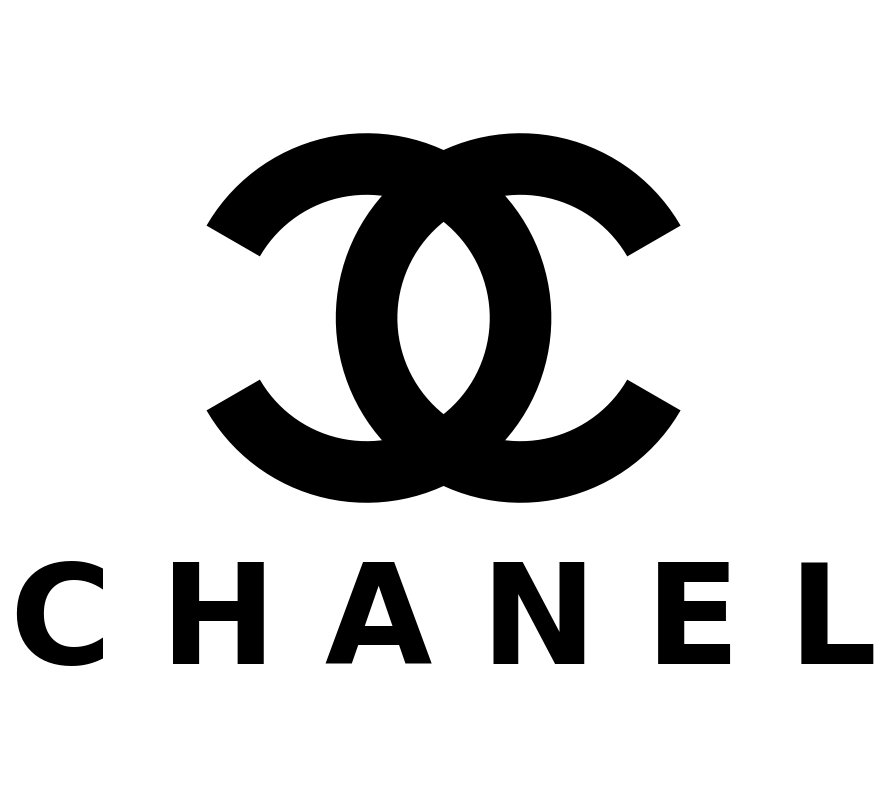

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Create a figure with white background
plt.figure(figsize=(8, 10), facecolor='white')

# Create axis with white background and no axes
ax = plt.gca()
ax.set_facecolor('white')
ax.set_aspect('equal')

# Hide axes
ax.axis('off')

# Parameters for the C's
center_x, center_y = 0, 0
radius = 1
thickness = 0.4

# Function to create points for an arc
def create_arc_points(start_angle, end_angle, radius, num_points=100):
    theta = np.linspace(start_angle, end_angle, num_points)
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)
    return x, y

# Create the left C
start_angle_left = np.radians(-150)
end_angle_left = np.radians(150)
x_left_outer, y_left_outer = create_arc_points(start_angle_left, end_angle_left, radius + thickness/2)
x_left_inner, y_left_inner = create_arc_points(start_angle_left, end_angle_left, radius - thickness/2)

# Create the right C
start_angle_right = np.radians(30)
end_angle_right = np.radians(330)
x_right_outer, y_right_outer = create_arc_points(start_angle_right, end_angle_right, radius + thickness/2)
x_right_inner, y_right_inner = create_arc_points(start_angle_right, end_angle_right, radius - thickness/2)

# Shift the C's horizontally
shift = 0.50
x_left_outer = x_left_outer - shift
x_left_inner = x_left_inner - shift
x_right_outer = x_right_outer + shift
x_right_inner = x_right_inner + shift

# Plot the left C
plt.fill(np.append(x_left_outer, x_left_inner[::-1]),
         np.append(y_left_outer, y_left_inner[::-1]),
         'black')

# Plot the right C
plt.fill(np.append(x_right_outer, x_right_inner[::-1]),
         np.append(y_right_outer, y_right_inner[::-1]),
         'black')

# Add CHANEL text
plt.text(0, -2, 'C H A N E L',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=100,
         fontweight='bold',
         family='sans-serif')

# Set the plot limits
plt.xlim(-2, 2)
plt.ylim(-3, 2)

# Save the figure with matplotlib
plt.savefig('chanel_logo_matplotlib.png',
            bbox_inches='tight',
            dpi=300,
            facecolor='white')

# Save and process with OpenCV
# First, save the plot to a temporary buffer
plt.savefig('temp_logo.png',
            bbox_inches='tight',
            dpi=300,
            facecolor='white')

# Read the image with OpenCV
img = cv2.imread('temp_logo.png')

# Optional: You can perform OpenCV operations here, for example:
# Resize the image
height, width = img.shape[:2]
new_width = 800
new_height = int(height * (new_width / width))
resized_img = cv2.resize(img, (new_width, new_height))

# Save the final image with OpenCV
cv2.imwrite('chanel_logo_opencv.png', resized_img)

# Display the plot
plt.show()